<a href="https://colab.research.google.com/github/prasadanilmore/Sentiment-analysis_keyword-extraction_Master-thesis/blob/main/Script_Master_Thesis_Prasad_More.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the modules

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For Word Cloud
from wordcloud import WordCloud
from os import path
from PIL import Image

# For Data Preprocessing
import re
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Splitting dataset
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import FunctionTransformer

# Balancing
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc

# For Modelling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from gensim.models import Word2Vec
from sklearn.pipeline import Pipeline
import xgboost as xgb

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
os.chdir("/content/drive/MyDrive/ThesisData/prasad/")

# Reading file

In [ ]:
df1 = pd.read_csv("yelp_training_set_review.csv")
df1.head(2)

,Unnamed: 0,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,...,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id
0,0,False,Breakfast & Brunch; Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,NaN,...,331,Jason,376,user,1034,5,My wife took me here on my birthday for breakf...,review,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,1,False,Italian; Pizza; Restaurants,Phoenix,"4848 E Chandler Blvd\nPhoenix, AZ 85044",ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,NaN,...,2,Paul,2,user,0,5,I have no idea why some people give bad review...,review,0,0a2KyEL0d3Yb1V6aivbIuQ


In [ ]:
df1.columns

Index(['Unnamed: 0', 'business_blank', 'business_categories', 'business_city',
       'business_full_address', 'business_id', 'business_latitude',
       'business_longitude', 'business_name', 'business_neighborhoods',
       'business_open', 'business_review_count', 'business_stars',
       'business_state', 'business_type', 'cool', 'date', 'funny', 'review_id',
       'reviewer_average_stars', 'reviewer_blank', 'reviewer_cool',
       'reviewer_funny', 'reviewer_name', 'reviewer_review_count',
       'reviewer_type', 'reviewer_useful', 'stars', 'text', 'type', 'useful',
       'user_id'],
      dtype='object')

# Raw Data Exploration

In [ ]:
df1.head(2)

,Unnamed: 0,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,...,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id
0,0,False,Breakfast & Brunch; Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,NaN,...,331,Jason,376,user,1034,5,My wife took me here on my birthday for breakf...,review,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,1,False,Italian; Pizza; Restaurants,Phoenix,"4848 E Chandler Blvd\nPhoenix, AZ 85044",ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,NaN,...,2,Paul,2,user,0,5,I have no idea why some people give bad review...,review,0,0a2KyEL0d3Yb1V6aivbIuQ


Feature Map and Brand Presence by Region count

In [ ]:
# Map to trace the review locations
import folium
from folium.plugins import FastMarkerCluster

lats = df1['business_latitude'].tolist()
lons = df1['business_longitude'].tolist()
locations = list(zip(lats, lons))

map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=5)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [ ]:
df1['business_name']=df1.business_name.str.replace('$','')
df1['business_name']=df1.business_name.str.replace("'",'')
df1['business_name']=df1.business_name.str.lower()
df1['business_name']=df1.business_name.map(lambda x: re.sub(r'\W+','',x))


Brand_1=df1.groupby(['business_name']).agg({'business_name':'count'})
Brand_1.columns=['number']
Brand_1=Brand_1.sort_values('number',ascending=False)

# Brand_1.head(10)
Brand_1.nlargest(15,'number').index

<ipython-input-9-ff106078526e>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['business_name']=df1.business_name.str.replace('$','')


Index(['pitajungle', 'oreganospizzabistro', 'cornishpastycompany',
       'phoenixskyharborinternationalairport', 'loloschickenwaffles',
       'pizzeriabianco', 'fourpeaksbrewingco', 'mattsbigbreakfast',
       'chinobandido', 'fez', 'truefoodkitchen', 'rasushibarrestaurant',
       'cibo', 'postinoarcadia', 'smashburger'],
      dtype='object', name='business_name')

In [ ]:
Brands=['pitajungle', 'oreganospizzabistro', 'cornishpastycompany',
       'phoenixskyharborinternationalairport', 'loloschickenwaffles',
       'pizzeriabianco', 'fourpeaksbrewingco', 'mattsbigbreakfast',
       'chinobandido', 'fez', 'truefoodkitchen', 'rasushibarrestaurant',
       'cibo', 'postinoarcadia', 'smashburger']
data1=df1[df1.business_name.isin(Brands)]

# print(data1.shape)
data1.head(10)

d1=data1.groupby(['business_city','business_name']).agg({'business_name':'count'})
d1.columns=['Stores']
d1.reset_index(inplace=True)
d1.sort_values(['business_city','Stores'],ascending=False,inplace=True)
d1.reset_index(inplace=True)
d1.drop('index',inplace=True,axis=1)

import plotly.graph_objects as go
import plotly.express as px

fig = px.scatter(d1, x="Stores", y="business_name", color="business_city",
                 title="Brand Presence by Region-Store Counts",
                 labels={"Stores":"Store Count"}
                )

fig.update_layout(
    margin=dict(l=20, r=20, t=25, b=20)
#     paper_bgcolor="LightSteelBlue",
)
fig.show()

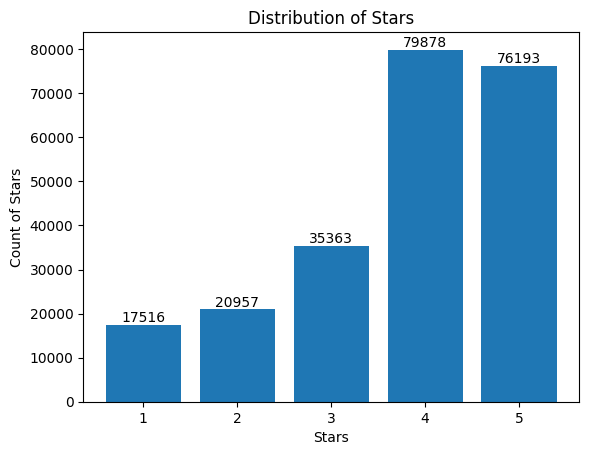

In [ ]:
# The star distribution
value, count = np.unique(df["stars"], return_counts=True)

plt.figure()
plt.bar(value, count, label = [1,2,3,4,5])
plt.xlabel("Stars")
plt.ylabel("Count of Stars")
plt.title("Distribution of Stars")
# Add count labels on top of each bar
for i, c in enumerate(count):
    plt.text(value[i], c, str(c), ha='center', va='bottom')

plt.show()

Distribution of Top 20 Words

In [ ]:
from collections import Counter

def histogram_dict(word_list):

    word_dict = {}

    for word in word_list:
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

x_values = []
y_values = []
textab = df[df['target'].isin([0,1])]['text']
texta = " ".join(i for i in textab if i is not None and i!="" and type(i)==str)
text_words = re.findall(r'\w+', texta)
a=Counter(histogram_dict(text_words))
for k, v in a.most_common(20):
  print('%s: %i' % (k, v))
  x_values.append(k)
  y_values.append(v)

plt.bar(x_values,y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top Words Frequency Histogram')
plt.ticklabel_format(style="plain", axis="y")
plt.xticks(rotation=45)

for i in range(5):
  plt.text(x_values[i], y_values[i], str(y_values[i]), ha='center', va="bottom")

plt.show()


# Dimension Reduction

Dataset with Necessary columns

In [ ]:
df = df1[["business_name",'user_id',"review_id",'stars','text']]
df.head()

,business_name,user_id,review_id,stars,text
0,Morning Glory Cafe,rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...
1,Spinato's Pizzeria,0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...
2,Haji-Baba,0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...
3,Chaparral Dog Park,uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,Discount Tire,vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...


Created a Target Column

In [ ]:
# Creating a Target Column to label the sentiments from stars, so less than 3 stars is Negative and greater than 3 stars is positive
df["target"] = np.where(df["stars"] > 3,1,0)
df.head()

<ipython-input-8-3b0d7665822c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = np.where(df["stars"] > 3,1,0)


,business_name,user_id,review_id,stars,text,target
0,Morning Glory Cafe,rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,1
1,Spinato's Pizzeria,0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,1
2,Haji-Baba,0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,1
3,Chaparral Dog Park,uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1
4,Discount Tire,vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,1


## Reduce Dataset to 50k ROws

In [ ]:
df_final = df[["text", "target"]][:50000]


,text,target
0,My wife took me here on my birthday for breakf...,1
1,I have no idea why some people give bad review...,1


# Data Preprocessing

Cleaning the raw text

In [ ]:
stop = stopwords.words("english")

def function_clean(text):
  if isinstance(text, str):
    text = re.sub(r"http\S+", "", text) #removing the URL Http
    # Removal of mentions
    text = re.sub("@[^\s]*", "", text)
    # Removal of hashtags
    text = re.sub("#[^\s]*", "", text)
    # Remove characters from languages other than English
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    # Remove Punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Removal of numbers
    text = re.sub('[0-9]*[+-:]*[0-9]+', '', text)
    text = re.sub("'s", "", text)
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)


In [ ]:
df_final = df_final.dropna(inplace=True)

In [ ]:
df_final["text"] = df_final["text"].apply(function_clean)
df_final["text"].head(2)

0    wife took birthday breakfast excellent weather...
1    idea people give bad reviews place goes show p...
Name: text, dtype: object

# Word Cloud

In [ ]:
# Divinding the reviews in postive and negative

pos = df_final[df_final["target"] == 1]["text"]
neg = df_final[df_final["target"] == 0]["text"]

Positive Word cloud

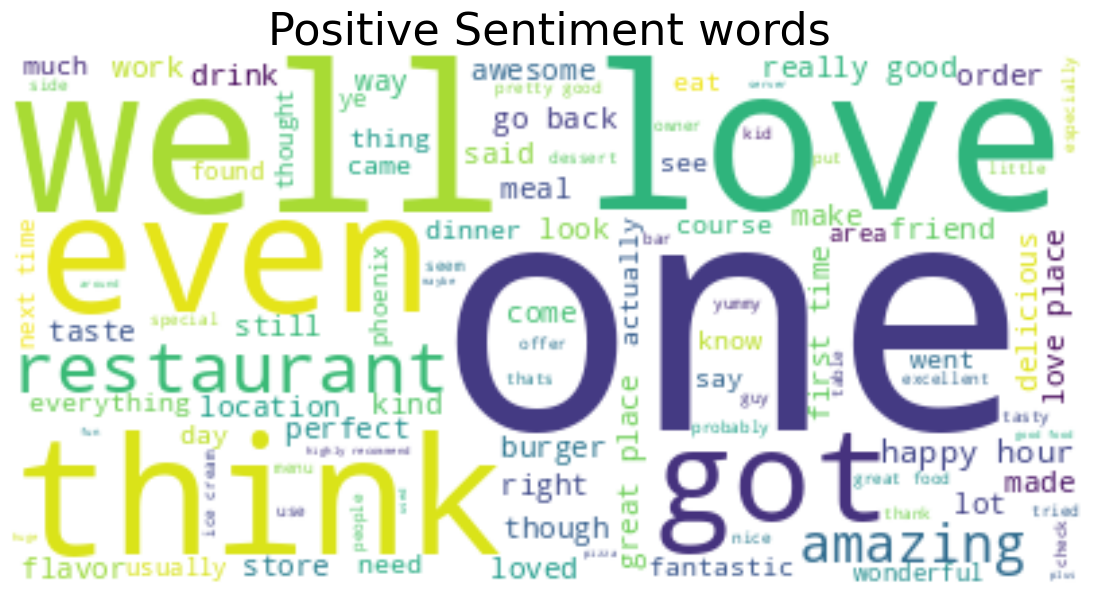

In [ ]:
from wordcloud import WordCloud, STOPWORDS

text_pos = " ".join(i for i in pos if i is not None and i != "")
# Create a word cloud image
wc_pos = WordCloud(background_color="white", max_words=100, stopwords = STOPWORDS, contour_width=10, contour_color='firebrick')
wc_pos.generate(text_pos)
plt.figure(figsize=(14,7))
plt.imshow(wc_pos, interpolation='bilinear')
plt.title("Positive Sentiment words", fontsize=32)
plt.axis("off")
plt.show()

Negative word cloud

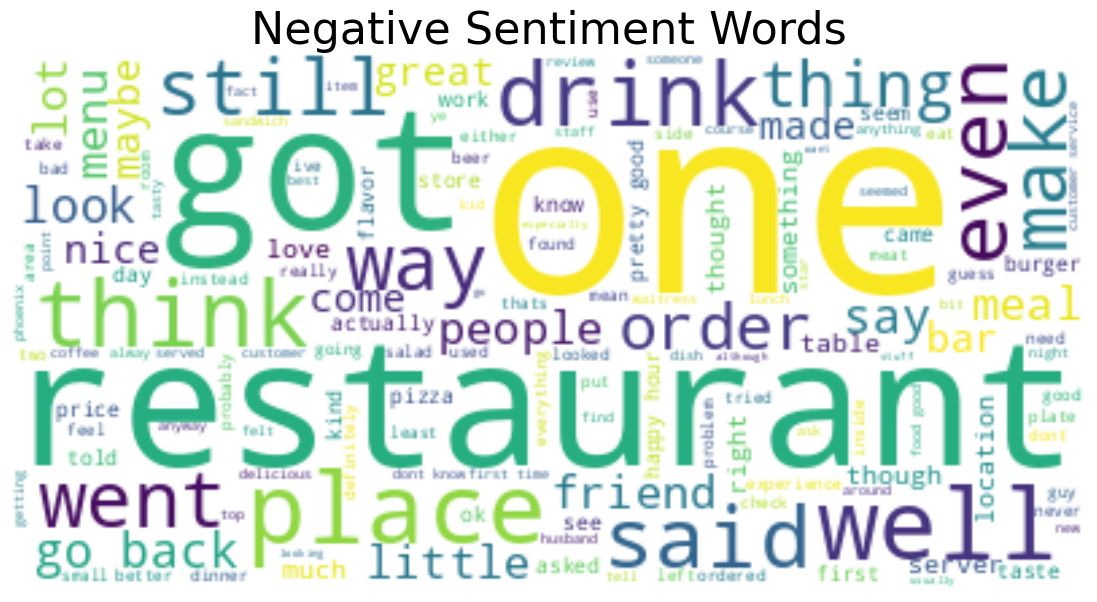

In [ ]:
text_pos = " ".join(i for i in neg if i is not None and i != "")
# Create a word cloud image
wc_neg = WordCloud(background_color="white", max_words=150, stopwords = STOPWORDS, contour_width=10, contour_color='firebrick')
wc_neg.generate(text_pos)
plt.figure(figsize=(14,7))
plt.imshow(wc_neg, interpolation='bilinear')
plt.title("Negative Sentiment Words", fontsize=32)
plt.axis("off")
plt.show()

Distribution of word length for Positive sentiments

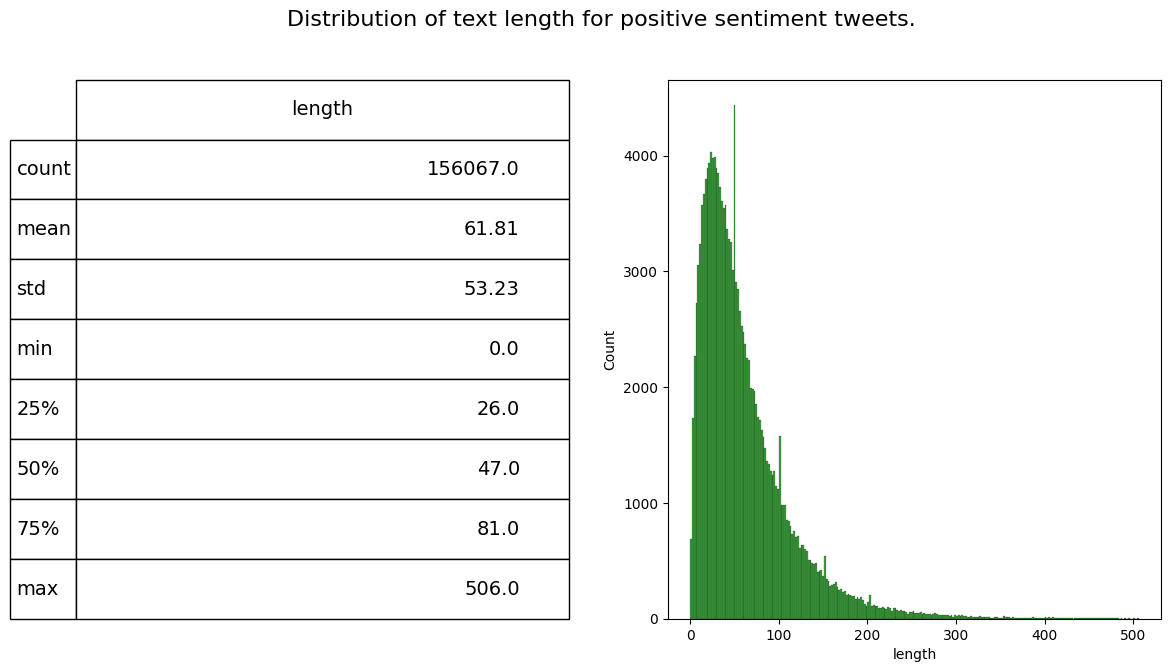

In [ ]:
df_temp = df_final

fig = plt.figure(figsize=(14,7))
df_temp['length'] = df_temp.text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df_temp[df_temp['target']==1]['length'], ax=ax1,color='green')
describe = df_temp.length[df_temp.target==1].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

# Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

u1 = df_final['text']
u2 = df_final['target']

undersample = RandomUnderSampler(sampling_strategy=1)

u1_resampled, u2_resampled = undersample.fit_resample(u1.values.reshape(-1, 1), u2)

df_resampled = pd.DataFrame({'text': u1_resampled.flatten(), 'target': u2_resampled})

# Check the balance of the target classes after undersampling
print(df_resampled['target'].value_counts())

0    73834
1    73834
Name: target, dtype: int64


In [ ]:
df_final["target"].value_counts()

1    156067
0     73834
Name: target, dtype: int64

In [ ]:
df_resampled["target"].value_counts()

0    73834
1    73834
Name: target, dtype: int64

In [ ]:
subset1 = df_resampled[df_resampled["target"]==1][:25000]
subset2 = df_resampled[df_resampled["target"]==0][:25000]

In [ ]:
df_comp = pd.concat([subset1, subset2])

After Sampling Dataset

In [ ]:
df_comp.target.value_counts()

1    25000
0    25000
Name: target, dtype: int64

In [ ]:
df_comp.head(5)

,text,target
0,cant help comment restaurants amazing architec...,1
1,easy make mediocre pizza oh difficult find rig...,1
2,know may huge chain one works like well oiled ...,1
3,wife stopped day area spotted rusticlooking ou...,1
4,happy hour awesome yard house ahi stack great ...,1


Saving the cleaned Dataset

In [ ]:
df_comp.to_csv("df_final.csv", index=False)

# Train-Test Split

In [ ]:
df_comp = pd.read_csv("df_final.csv")

Again Removing any Null Values before modelling

In [ ]:
df_comp.dropna(inplace=True)

Splitting the Balanced Dataset

In [ ]:
X = df_comp["text"]
y = df_comp["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39999,), (10000,), (39999,), (10000,))

In [ ]:
X_train.head(2)

22204    spicy ramen dish delicious great food fast ser...
16459    real deal arepas wonderful although personally...
Name: text, dtype: object

In [ ]:
y_train.head(2)

22204    1
16459    1
Name: target, dtype: int64

# Post-processing Data Analysis

In [ ]:
# Tokenize the words

ENGLISH_STOP_WORDS = stopwords.words('english')

def tokenize(sentence):
   # to remove any space from beginning and the end of text
    listofwords = sentence.strip().split()
    listof_words = []
    for word in listofwords:
        if not word in ENGLISH_STOP_WORDS:
            lemm_word = WordNetLemmatizer().lemmatize(word)
            # remove the stop words
            if len(word)>0:
                listof_words.append(word)
    return(listof_words)

Count word frequencies for each sentiment

In [ ]:
# Count word frequencies for each sentiment
from collections import Counter


positive_word_counts = Counter(pos)
negative_word_counts = Counter(neg)

# Select the most common words
num_common_words = 10
common_positive_words = positive_word_counts.most_common(num_common_words)
common_negative_words = negative_word_counts.most_common(num_common_words)

# Extract word and frequency information
positive_words, positive_frequencies = zip(*common_positive_words)
negative_words, negative_frequencies = zip(*common_negative_words)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(positive_words, positive_frequencies, color='green', label='Positive')
plt.bar(negative_words, negative_frequencies, color='red', label='Negative')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words Across Sentiments')
plt.legend()
plt.xticks(rotation=45)
plt.show()

good: 152339
place: 150376
food: 139492
great: 114934
like: 114698
one: 93652
get: 88262
time: 79826
go: 78741
really: 77817
service: 73020
would: 71068
back: 68998
dont: 57213
also: 56624
im: 53433
love: 52173
nice: 50510
little: 49987
well: 48778


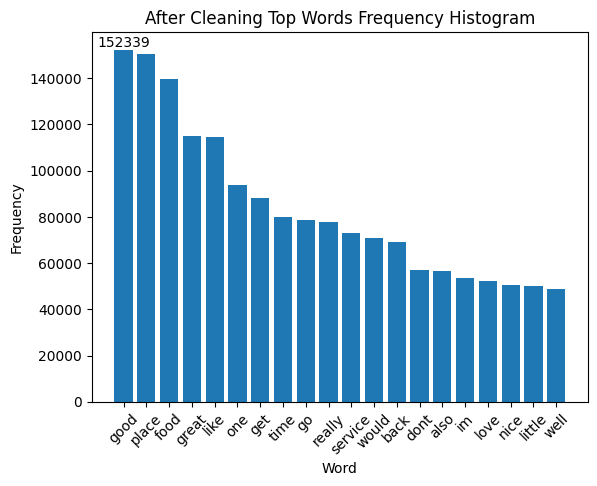

In [ ]:
from collections import Counter

def histogram_dict(word_list):

    word_dict = {}

    for word in word_list:
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

x_values = []
y_values = []
textab = df_final[df_final['target'].isin([0,1])]['text']
texta = " ".join(i for i in textab if i is not None and i!="" and type(i)==str)
text_words = re.findall(r'\w+', texta)
a=Counter(histogram_dict(text_words))
for k, v in a.most_common(20):
  print('%s: %i' % (k, v))
  x_values.append(k)
  y_values.append(v)

plt.bar(x_values,y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('After Cleaning Top Words Frequency Histogram')
plt.ticklabel_format(style="plain", axis="y")
plt.xticks(rotation=45)

for i in range(1):
  plt.text(x_values[i], y_values[i], str(y_values[i]), ha='center', va="bottom")

plt.show()



After Sampling Sentiments Distribution

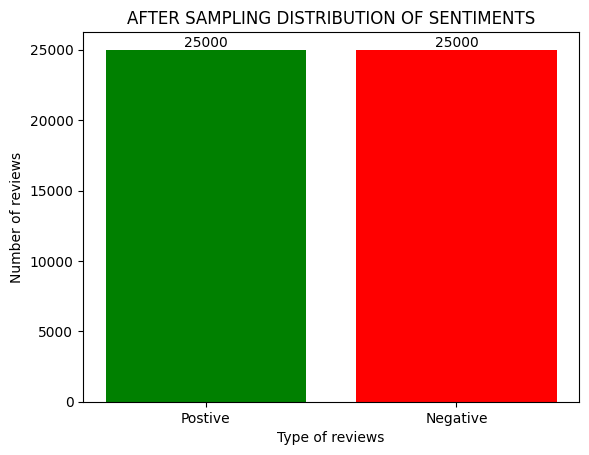

In [ ]:
pos_count = df_comp["target"].value_counts()[1]
neg_count = df_comp["target"].value_counts()[0]
colors = ["green", "red"]

plt.bar(["Postive","Negative"], [pos_count, neg_count], color=colors)
plt.xlabel('Type of reviews')
plt.ylabel('Number of reviews')
plt.title('AFTER SAMPLING DISTRIBUTION OF SENTIMENTS')

for i, count in enumerate([pos_count, neg_count]):
  plt.text(i, count, str(count), ha="center", va="bottom")

plt.show()

Most Repititive Words (After removing Stopwords)

In [ ]:
#counting most repetitive words
word_counts = np.array(np.sum(X_train1, axis=0)).reshape((-1,))
words = np.array(vec1.get_feature_names_out())
words_df = pd.DataFrame({"word":words, "count":word_counts})
words_df["count"] = words_df["count"].apply(lambda x: round(x))
words_df.sort_values(by="count",ascending=False).head(20)

,word,count
1231,good,1400
1078,food,1388
2198,place,1378
1290,great,1221
1682,like,1064
2661,service,917
3059,time,835
2416,really,833
1755,love,700
810,dont,677


Top 3 Most repititive Words (Pie-Chart)

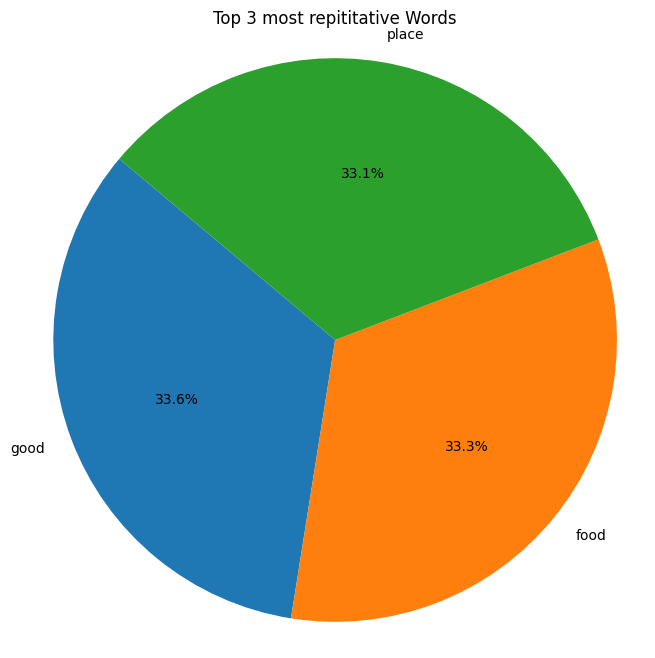

In [ ]:
dict1 = {
    "word": ["good","food", "place", "great", "like", "service" ],
    "count": [1400,1388,1378,1221,1064,917]
}

top_words_df = pd.DataFrame(dict1)
# Calculate the percentage for each word
top_words_df = top_words_df.head(3)
total_count = top_words_df["count"].sum()
top_words_df["percentage"] = (top_words_df["count"] / total_count) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_words_df["percentage"], labels=top_words_df["word"], autopct="%1.1f%%", startangle=140)
plt.title("Top 3 most repititative Words")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Feature Extraction

## TFIDF vectoriser

In [ ]:
# Tokenize the words
ENGLISH_STOP_WORDS = stopwords.words('english')

def tokenize(sentence):
   # to remove any space from beginning and the end of text
    listofwords = sentence.strip().split()
    listof_words = []
    for word in listofwords:
        if not word in ENGLISH_STOP_WORDS:
            lemm_word = WordNetLemmatizer().lemmatize(word)
            # remove the stop words
            if len(word)>0:
                listof_words.append(word)
    return(listof_words)

In [ ]:
# Vectorisation with TF-IDF
def tfidf_vectorize(texts, max_features=5000):
    tfidf_vectorizer = TfidfVectorizer(max_features=max_features, min_df=100, tokenizer=tokenize, stop_words='english', ngram_range=(1,3))
    return tfidf_vectorizer.fit_transform(texts).toarray()

## Word2Vec vectoriser

In [ ]:
def word2vec_vectorize(texts):
    # Tokenize the texts into sentences
    sentences = [text.split() for text in texts]

    # Create Word2Vec model
    model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

    # Create the word vector representations for each text
    vectors = []
    for sentence in sentences:
        vec = np.mean([model.wv[word] for word in sentence if word in model.wv], axis=0)
        vectors.append(vec)

    return np.array(vectors)

In [ ]:
class Word2VecVectorizer:
    def __init__(self, word2vec_model):
        self.word2vec_model = word2vec_model

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array([self.word2vec_vectorize(text) for text in X])

    def word2vec_vectorize(self, text):
        words = tokenize(text)
        word_vectors = []
        for word in words:
            if word in self.word2vec_model.wv:
                word_vectors.append(self.word2vec_model.wv[word])

        if len(word_vectors) > 0:
            return np.mean(word_vectors, axis=0)
        else:
            # Return a vector of zeros if no words in the text are in the Word2Vec model
            return np.zeros(self.word2vec_model.vector_size)

# Keyword Extraction

## YAKE

In [ ]:
!pip install yake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.3 MB/s eta 0:00:00


In [ ]:
from yake import KeywordExtractor

def extract_keywords_yake(review_text):
    # Initialize the YAKE keyword extractor
    language = "en"
    max_ngram_size = 3
    deduplication_threshold = 0.9
    numOfKeywords = 10  # Number of keywords to extract
    custom_kw_extractor = KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)

    # Extract keywords from the review text
    keywords = custom_kw_extractor.extract_keywords(review_text)

    # Get the list of extracted keywords and their scores
    extracted_keywords_with_scores = [(keyword, score) for keyword, score in keywords]

    return extracted_keywords_with_scores

# Example usage
review_text = "The restaurant offered delicious food and excellent service. The ambiance was cozy and welcoming."
keywords_with_scores = extract_keywords_yake(review_text)
for keyword, score in keywords_with_scores:
    print(f"Keyword: {keyword}, Score: {score}")

Keyword: restaurant offered delicious, Score: 0.009001679881101624
Keyword: offered delicious food, Score: 0.009001679881101624
Keyword: excellent service, Score: 0.02541909697430123
Keyword: restaurant offered, Score: 0.04188746641162499
Keyword: offered delicious, Score: 0.04188746641162499
Keyword: delicious food, Score: 0.04188746641162499
Keyword: food and excellent, Score: 0.04188746641162499
Keyword: service, Score: 0.12363091320521931
Keyword: cozy and welcoming, Score: 0.18075564686791562
Keyword: restaurant, Score: 0.2005079697193566


In [ ]:
import nltk
from gensim.summarization import keywords
import yake

# Sample text for keyword extraction
text = df_comp["text"][1]

# Tokenize the text into sentences
sentences = nltk.sent_tokenize(text)

# Calculate the average keyword context similarity for TextRank and YAKE algorithms
unigram_scores = {'TextRank': [], 'YAKE!': []}
bigram_scores = {'TextRank': [], 'YAKE!': []}
trigram_scores = {'TextRank': [], 'YAKE!': []}

for sentence in sentences:
    # Extract keywords using TextRank algorithm
    text_rank_keywords = keywords(sentence, words=10, lemmatize=True, split=True)

    # Extract keywords using YAKE algorithm
    custom_kw_extractor = yake.KeywordExtractor()
    yake_keywords = custom_kw_extractor.extract_keywords(sentence)
    yake_keywords = [kw[0] for kw in yake_keywords]

    # Calculate n-gram scores for TextRank
    text_rank_unigrams = set(text_rank_keywords)
    text_rank_bigrams = set(nltk.ngrams(text_rank_keywords, 2))
    text_rank_trigrams = set(nltk.ngrams(text_rank_keywords, 3))

    # Calculate n-gram scores for YAKE
    yake_unigrams = set(yake_keywords)
    yake_bigrams = set(nltk.ngrams(yake_keywords, 2))
    yake_trigrams = set(nltk.ngrams(yake_keywords, 3))

    # Calculate similarity scores for unigrams, bigrams, and trigrams
    unigram_sim_text_rank = len(text_rank_unigrams.intersection(yake_unigrams)) / len(text_rank_unigrams.union(yake_unigrams))
    bigram_sim_text_rank = len(text_rank_bigrams.intersection(yake_bigrams)) / len(text_rank_bigrams.union(yake_bigrams))
    trigram_sim_text_rank = len(text_rank_trigrams.intersection(yake_trigrams)) / len(text_rank_trigrams.union(yake_trigrams))

    # Append scores to dictionaries
    unigram_scores['TextRank'].append(unigram_sim_text_rank)
    bigram_scores['TextRank'].append(bigram_sim_text_rank)
    trigram_scores['TextRank'].append(trigram_sim_text_rank)

    unigram_scores['YAKE!'].append(1.0)  # YAKE! does not provide similarity scores for n-grams
    bigram_scores['YAKE!'].append(1.0)   # YAKE! does not provide similarity scores for n-grams
    trigram_scores['YAKE!'].append(1.0)  # YAKE! does not provide similarity scores for n-grams

# Calculate average similarity scores
average_unigram_score_text_rank = sum(unigram_scores['TextRank']) / len(unigram_scores['TextRank'])
average_bigram_score_text_rank = sum(bigram_scores['TextRank']) / len(bigram_scores['TextRank'])
average_trigram_score_text_rank = sum(trigram_scores['TextRank']) / len(trigram_scores['TextRank'])

average_unigram_score_yake = sum(unigram_scores['YAKE!']) / len(unigram_scores['YAKE!'])
average_bigram_score_yake = sum(bigram_scores['YAKE!']) / len(bigram_scores['YAKE!'])
average_trigram_score_yake = sum(trigram_scores['YAKE!']) / len(trigram_scores['YAKE!'])

# Display the results
print("Method\tUnigram score\tBigram score\tTrigram score")
print(f"TextRank\t{average_unigram_score_text_rank:.4f}\t\t{average_bigram_score_text_rank:.4f}\t\t{average_trigram_score_text_rank:.4f}")
print(f"YAKE!\t{average_unigram_score_yake:.4f}\t\t{average_bigram_score_yake:.4f}\t\t{average_trigram_score_yake:.4f}")


ModuleNotFoundError: ignored

## TextRank

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize
import string
from nltk.stem import WordNetLemmatizer

def text_rank_keyword_extraction(text):
    # Clean the text by converting to lowercase and removing non-printable characters
    def clean(text):
        text = text.lower()
        printable = set(string.printable)
        text = filter(lambda x: x in printable, text)
        text = "".join(list(text))
        return text

    cleaned_text = clean(text)
    tokens = word_tokenize(cleaned_text)

    # Perform Part-of-Speech (POS) tagging

    pos_tags = nltk.pos_tag(tokens)

    # Lemmatize the text

    wordnet_lemmatizer = WordNetLemmatizer()
    adjective_tags = ['JJ', 'JJR', 'JJS']
    lemmatized_text = []

    for word, pos in pos_tags:
        if pos in adjective_tags:
            lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(word, pos="a")))
        else:
            lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(word)))  # default POS = noun

    # Filter out unwanted POS tags
    wanted_pos_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS', 'VBG', 'FW']
    stopwords = []

    for word, pos in nltk.pos_tag(lemmatized_text):
        if pos not in wanted_pos_tags:
            stopwords.append(word)

    punctuations = list(str(string.punctuation))
    stopwords = stopwords + punctuations
    stopwords_plus = set(stopwords)

    # Read additional stopwords from a file
    with open("stopword.txt", "r") as stopword_file:
        lots_of_stopwords = [line.strip() for line in stopword_file.readlines()]

    stopwords_plus = stopwords_plus.union(lots_of_stopwords)

    processed_text = [word for word in lemmatized_text if word not in stopwords_plus]

    return processed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
Text = "The restaurant is great, i tried spaghetti and tomato pasta which was fantastic, but the ambience could have been better"

In [ ]:
nltk.download('punkt')
import nltk
from nltk import word_tokenize
import string

def clean(text):
    text = text.lower()
    printable = set(string.printable)
    text = filter(lambda x: x in printable, text)
    text = "".join(list(text))
    return text

Cleaned_text = clean(Text)
text = word_tokenize(Cleaned_text)
print ("Tokenized Text: \n")
print (text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Tokenized Text: 

['the', 'restaurant', 'is', 'great', ',', 'i', 'tried', 'spaghetti', 'and', 'tomato', 'pasta', 'which', 'was', 'fantastic', ',', 'but', 'the', 'ambience', 'could', 'have', 'been', 'better']


POS Tagging For Lemmatization

In [ ]:
nltk.download('averaged_perceptron_tagger')

POS_tag = nltk.pos_tag(text)

print ("Tokenized Text with POS tags: \n")
print (POS_tag)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Tokenized Text with POS tags: 

[('the', 'DT'), ('restaurant', 'NN'), ('is', 'VBZ'), ('great', 'JJ'), (',', ','), ('i', 'JJ'), ('tried', 'VBD'), ('spaghetti', 'NNS'), ('and', 'CC'), ('tomato', 'NN'), ('pasta', 'NN'), ('which', 'WDT'), ('was', 'VBD'), ('fantastic', 'JJ'), (',', ','), ('but', 'CC'), ('the', 'DT'), ('ambience', 'NN'), ('could', 'MD'), ('have', 'VB'), ('been', 'VBN'), ('better', 'JJR')]


The tokenized text (mainly the nouns and adjectives) is normalized by lemmatization.

In [ ]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

adjective_tags = ['JJ','JJR','JJS']

lemmatized_text = []

for word in POS_tag:
    if word[1] in adjective_tags:
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(word[0],pos="a")))
    else:
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(word[0]))) #default POS = noun

print ("Text tokens after lemmatization of adjectives and nouns: \n")
print (lemmatized_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text tokens after lemmatization of adjectives and nouns: 

['the', 'restaurant', 'is', 'great', ',', 'i', 'tried', 'spaghetti', 'and', 'tomato', 'pasta', 'which', 'wa', 'fantastic', ',', 'but', 'the', 'ambience', 'could', 'have', 'been', 'good']


The lemmatized text is POS tagged here. The tags will be used for filtering later on.

In [ ]:
POS_tag = nltk.pos_tag(lemmatized_text)

print ("Lemmatized text with POS tags: \n")
print (POS_tag)

Lemmatized text with POS tags: 

[('the', 'DT'), ('restaurant', 'NN'), ('is', 'VBZ'), ('great', 'JJ'), (',', ','), ('i', 'JJ'), ('tried', 'VBD'), ('spaghetti', 'NNS'), ('and', 'CC'), ('tomato', 'NN'), ('pasta', 'NN'), ('which', 'WDT'), ('wa', 'VBZ'), ('fantastic', 'JJ'), (',', ','), ('but', 'CC'), ('the', 'DT'), ('ambience', 'NN'), ('could', 'MD'), ('have', 'VB'), ('been', 'VBN'), ('good', 'JJ')]


POS Based Filtering

In [ ]:
stopwords = []

wanted_POS = ['NN','NNS','NNP','NNPS','JJ','JJR','JJS','VBG','FW']

for word in POS_tag:
    if word[1] not in wanted_POS:
        stopwords.append(word[0])

punctuations = list(str(string.punctuation))

stopwords = stopwords + punctuations

Even if we remove the aforementioned stopwords, still some extremely common nouns, adjectives or gerunds may remain which are very bad candidates for being keywords (or part of it).

An external file constituting a long list of stopwords is loaded and all the words are added with the previous stopwords to create the final list 'stopwords-plus' which is then converted into a set.

(Source of stopwords data: https://www.ranks.nl/stopwords)

Stopwords-plus constitute the sum total of all stopwords and potential phrase-delimiters.


In [ ]:
stopword_file = open("stopword.txt", "r")
lots_of_stopwords = []

for line in stopword_file.readlines():
    lots_of_stopwords.append(str(line.strip()))

stopwords_plus = []
stopwords_plus = stopwords + lots_of_stopwords
stopwords_plus = set(stopwords_plus)

#Stopwords_plus contain total set of all stopwords

In [ ]:
processed_text = []
for word in lemmatized_text:
    if word not in stopwords_plus:
        processed_text.append(word)
print (processed_text)

['restaurant', 'great', 'spaghetti', 'tomato', 'pasta', 'fantastic', 'ambience', 'good']


In [ ]:
vocabulary = list(set(processed_text))
print (vocabulary)

['good', 'fantastic', 'spaghetti', 'great', 'ambience', 'tomato', 'restaurant', 'pasta']


In [ ]:
import numpy as np
import math
vocab_len = len(vocabulary)

weighted_edge = np.zeros((vocab_len,vocab_len),dtype=np.float32)

score = np.zeros((vocab_len),dtype=np.float32)
window_size = 3
covered_coocurrences = []

for i in range(0,vocab_len):
    score[i]=1
    for j in range(0,vocab_len):
        if j==i:
            weighted_edge[i][j]=0
        else:
            for window_start in range(0,(len(processed_text)-window_size)):

                window_end = window_start+window_size

                window = processed_text[window_start:window_end]

                if (vocabulary[i] in window) and (vocabulary[j] in window):

                    index_of_i = window_start + window.index(vocabulary[i])
                    index_of_j = window_start + window.index(vocabulary[j])

                    # index_of_x is the absolute position of the xth term in the window
                    # (counting from 0)
                    # in the processed_text

                    if [index_of_i,index_of_j] not in covered_coocurrences:
                        weighted_edge[i][j]+=1/math.fabs(index_of_i-index_of_j)
                        covered_coocurrences.append([index_of_i,index_of_j])

Calculating weighted summation of connections of a vertex

In [ ]:
inout = np.zeros((vocab_len),dtype=np.float32)

for i in range(0,vocab_len):
    for j in range(0,vocab_len):
        inout[i]+=weighted_edge[i][j]

In [ ]:
MAX_ITERATIONS = 50
d=0.85
threshold = 0.0001 #convergence threshold

for iter in range(0,MAX_ITERATIONS):
    prev_score = np.copy(score)

    for i in range(0,vocab_len):

        summation = 0
        for j in range(0,vocab_len):
            if weighted_edge[i][j] != 0:
                summation += (weighted_edge[i][j]/inout[j])*score[j]

        score[i] = (1-d) + d*(summation)

    if np.sum(np.fabs(prev_score-score)) <= threshold: #convergence condition
        print("Converging at iteration "+str(iter)+"....")
        break

Converging at iteration 23....


In [ ]:
for i in range(0,vocab_len):
    print("Score of "+vocabulary[i]+": "+str(score[i]))

Score of good: 0.15
Score of fantastic: 1.0381616
Score of spaghetti: 1.1982306
Score of great: 1.0381601
Score of ambience: 0.6727247
Score of tomato: 1.1819729
Score of restaurant: 0.67272377
Score of pasta: 1.1982219


Phrase Partitioning

In [ ]:
phrases = []

phrase = " "
for word in lemmatized_text:

    if word in stopwords_plus:
        if phrase!= " ":
            phrases.append(str(phrase).strip().split())
        phrase = " "
    elif word not in stopwords_plus:
        phrase+=str(word)
        phrase+=" "

print("Partitioned Phrases (Candidate Keyphrases): \n")
print(phrases)

Partitioned Phrases (Candidate Keyphrases): 

[['restaurant'], ['great'], ['spaghetti'], ['tomato', 'pasta'], ['fantastic'], ['ambience']]


Create a list of unique phrases. Repeating phrases\keyphrase candidates has no purpose here, anymore.

In [ ]:
unique_phrases = []

for phrase in phrases:
    if phrase not in unique_phrases:
        unique_phrases.append(phrase)

print("Unique Phrases (Candidate Keyphrases): \n")
print(unique_phrases)

Unique Phrases (Candidate Keyphrases): 

[['restaurant'], ['great'], ['spaghetti'], ['tomato', 'pasta'], ['fantastic'], ['ambience']]


Thinning the list of candidate-keyphrases.

In [ ]:
for word in vocabulary:
    #print word
    for phrase in unique_phrases:
        if (word in phrase) and ([word] in unique_phrases) and (len(phrase)>1):
            #if len(phrase)>1 then the current phrase is multi-worded.
            #if the word in vocabulary is present in unique_phrases as a single-word-phrase
            # and at the same time present as a word within a multi-worded phrase,
            # then I will remove the single-word-phrase from the list.
            unique_phrases.remove([word])

print("Thinned Unique Phrases (Candidate Keyphrases): \n")
print(unique_phrases)

Thinned Unique Phrases (Candidate Keyphrases): 

[['restaurant'], ['great'], ['spaghetti'], ['tomato', 'pasta'], ['fantastic'], ['ambience']]


Scoring Keyphrases

In [ ]:
phrase_scores = []
keywords = []
for phrase in unique_phrases:
    phrase_score=0
    keyword = ''
    for word in phrase:
        keyword += str(word)
        keyword += " "
        phrase_score+=score[vocabulary.index(word)]
    phrase_scores.append(phrase_score)
    keywords.append(keyword.strip())

i=0
for keyword in keywords:
    print ("Keyword: '"+str(keyword)+"', Score: "+str(phrase_scores[i]))
    i+=1

Keyword: 'restaurant', Score: 0.6727237701416016
Keyword: 'great', Score: 1.0381600856781006
Keyword: 'spaghetti', Score: 1.1982306241989136
Keyword: 'tomato pasta', Score: 2.3801947832107544
Keyword: 'fantastic', Score: 1.0381616353988647
Keyword: 'ambience', Score: 0.672724723815918


Ranking Keyphrases. Ranking keyphrases based on their calculated scores. Displaying top keywords_num no. of keyphrases.

In [ ]:
sorted_index = np.flip(np.argsort(phrase_scores),0)

keywords_num = 6

print("Keywords:\n")

for i in range(0,keywords_num):
    print(str(keywords[sorted_index[i]])+", ", end=' ')

Keywords:

tomato pasta,  spaghetti,  fantastic,  great,  ambience,  restaurant,  

## Average Context Score

In [ ]:
import nltk
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import yake
# Your TextRank keyword extraction function


# Sample reference summary for context score evaluation
reference_summary = """
When my parents visited Berlin, found a restaurant name Napoli, we tried different pizzas, but they were disgusting!
"""

# Sample text for keyword extraction
text = """
When my parents visited Berlin, we decided to take them to a nice restaurant and then we found a restaurant name Napoli, we tried different pizzas, but they were disgusting!
"""

# Tokenize the text into sentences
sentences = nltk.sent_tokenize(text)

# Extract keywords using TextRank algorithm
text_rank_keywords = []
for sentence in sentences:
    text_rank_keywords.extend(text_rank_keyword_extraction(sentence))

# Extract keywords using YAKE algorithm
custom_kw_extractor_yake = yake.KeywordExtractor()
yake_keywords = custom_kw_extractor_yake.extract_keywords(text)
yake_keywords = [kw[0] for kw in yake_keywords]

# Calculate embedding representation for reference summary and keywords
# (you may use pre-trained word embeddings or custom embedding models for this)
# For this example, we'll use random vectors as embeddings for demonstration purposes

# Function to calculate embedding for each keyword (using random vectors as an example)
def calculate_embedding(keyword):
    return np.random.rand(300)  # Replace this with your actual embedding representation

reference_summary_embedding = np.random.rand(300)  # Replace this with your actual embedding representation
text_rank_embeddings = [calculate_embedding(keyword) for keyword in text_rank_keywords]
yake_embeddings = [calculate_embedding(keyword) for keyword in yake_keywords]

# Calculate cosine similarity between reference summary embedding and each individual keyword embedding
text_rank_cosine_similarities = [cosine_similarity([reference_summary_embedding], [emb])[0][0] for emb in text_rank_embeddings]
yake_cosine_similarities = [cosine_similarity([reference_summary_embedding], [emb])[0][0] for emb in yake_embeddings]

# Calculate the average context score for TextRank and YAKE
average_context_score_text_rank = sum(text_rank_cosine_similarities) / len(text_rank_cosine_similarities)
average_context_score_yake = sum(yake_cosine_similarities) / len(yake_cosine_similarities)

# Display the results
print("Algorithm\tAverage Context Score")
print(f"TextRank\t{average_context_score_text_rank:.4f}")
print(f"YAKE!\t\t{average_context_score_yake:.4f}")


Algorithm	Average Context Score
TextRank	0.7389
YAKE!		0.7423


In [ ]:
#Modified function
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

def text_rank_keyword_extraction(text):
    def clean(text):
        text = text.lower()
        printable = set(string.printable)
        text = filter(lambda x: x in printable, text)
        text = "".join(list(text))
        return text

    def lemmatize_tokens(tokens):
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        return lemmatized_tokens

    def generate_ngrams(tokens, n):
        return list(ngrams(tokens, n))

    cleaned_text = clean(text)
    tokens = word_tokenize(cleaned_text)
    lemmatized_tokens = lemmatize_tokens(tokens)

    # Perform Part-of-Speech (POS) tagging
    pos_tags = nltk.pos_tag(lemmatized_tokens)

    # Filter out unwanted POS tags
    wanted_pos_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS', 'VBG', 'FW']
    stopwords = []

    for word, pos in pos_tags:
        if pos not in wanted_pos_tags:
            stopwords.append(word)

    punctuations = list(string.punctuation)
    stopwords = stopwords + punctuations
    stopwords_plus = set(stopwords)

    # Read additional stopwords from a file (if required)
    with open("stopword.txt", "r") as stopword_file:
        lots_of_stopwords = [line.strip() for line in stopword_file.readlines()]

    stopwords_plus = stopwords_plus.union(lots_of_stopwords)

    processed_text_unigram = [word for word in lemmatized_tokens if word not in stopwords_plus]
    processed_text_bigram = [word for word in generate_ngrams(lemmatized_tokens, 2) if all(w not in stopwords_plus for w in word)]
    processed_text_trigram = [word for word in generate_ngrams(lemmatized_tokens, 3) if all(w not in stopwords_plus for w in word)]

    return processed_text_unigram, processed_text_bigram, processed_text_trigram


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Context Score Across UniGram, BiGram and Trigram

In [ ]:
import nltk
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from nltk.util import ngrams
import yake
import torch
from transformers import BertTokenizer, BertModel

# Placeholder Yelp restaurant review
restaurant_review = """
I had an amazing experience at this restaurant! The food was delicious, and the service was excellent.
The ambiance was cozy and inviting. I highly recommend their signature dish and desserts. Will visit again!
"""

# Placeholder reference summary for context score evaluation
reference_summary = """
This restaurant offers delicious food, excellent service, and a cozy ambiance. Highly recommended!
"""

# Tokenize the text into sentences
sentences = nltk.sent_tokenize(restaurant_review)

# Extract keywords using TextRank algorithm
text_rank_unigrams, text_rank_bigrams, text_rank_trigrams = [], [], []
for sentence in sentences:
    unigrams, bigrams, trigrams = text_rank_keyword_extraction(sentence)
    text_rank_unigrams.extend(unigrams)
    text_rank_bigrams.extend(bigrams)
    text_rank_trigrams.extend(trigrams)

# Convert unigrams to lowercase for consistency
text_rank_unigrams = [keyword.lower() for keyword in text_rank_unigrams]

# Function to convert n-grams to lowercase and calculate embeddings (using random vectors as an example)
def calculate_embedding(word):
    # Load pre-trained BERT model and tokenizer
    model_name = 'bert-base-uncased'
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertModel.from_pretrained(model_name)

    # Tokenize and encode the reference summary
    tokens = tokenizer.encode(reference_summary, add_special_tokens=True)
    input_ids = torch.tensor(tokens).unsqueeze(0)  # Adding batch dimension

    # Get BERT embeddings
    with torch.no_grad():
        outputs = model(input_ids)
        embeddings = outputs.last_hidden_state  # Get embeddings from the last hidden layer

    # Calculate average embedding for the reference summary
    avg_embedding = torch.mean(embeddings, dim=1).squeeze(0)

    # Convert to numpy array
    reference_embedding = avg_embedding.numpy()

    return reference_embedding

# Calculate embeddings for TextRank unigrams, bigrams, and trigrams
text_rank_embeddings_unigram = [calculate_embedding(keyword) for keyword in text_rank_unigrams]
text_rank_embeddings_bigram = [calculate_embedding(keyword) for keyword in text_rank_bigrams]
text_rank_embeddings_trigram = [calculate_embedding(keyword) for keyword in text_rank_trigrams]

# Calculate the average context score for TextRank for unigram, bigram, and trigram keywords
reference_summary_embedding = calculate_embedding(reference_summary)  # Replace this with your actual embedding representation

def calculate_average_context_score(embeddings):
    if len(embeddings) == 0:
        return 0.0
    cosine_similarities = [cosine_similarity([reference_summary_embedding], [emb])[0][0] for emb in embeddings]
    return sum(cosine_similarities) / len(cosine_similarities)

average_context_score_text_rank_unigram = calculate_average_context_score(text_rank_embeddings_unigram)
average_context_score_text_rank_bigram = calculate_average_context_score(text_rank_embeddings_bigram)
average_context_score_text_rank_trigram = calculate_average_context_score(text_rank_embeddings_trigram)

# Display the results
print("Method\t\tUnigram score\tBigram score\tTrigram score")
print(f"Textrank\t{average_context_score_text_rank_unigram:.4f}\t\t{average_context_score_text_rank_bigram:.4f}\t\t{average_context_score_text_rank_trigram:.4f}")
print(f"YAKE!\t\t{average_context_score_yake_unigram:.4f}\t\t{average_context_score_yake_bigram:.4f}\t\t{average_context_score_yake_trigram:.4f}")

Method		Unigram score	Bigram score	Trigram score
Textrank	0.7577		0.7532		0.7656
YAKE!		0.7355		0.7267		0.7471


# Modeling

the natural language processing and machine learning techniques are used to create the classifiers in order to explore the polarity of the reviews easily.
Hence, we analyze the reviews given by the customers for the restaurant with the the implementation of various classification algorithms such as

### Model Function declartion

In [ ]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [ ]:
def plot_roc_curve(y_true, y_prob, num_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true, y_prob[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')


In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
    sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')

# Add labels, title, and axis ticks
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('XGBoost with TF-IDF Confusion Matrix')
    plt.xticks([0, 1], ['Negative', 'Positive'])
    plt.yticks([0, 1], ['Negative', 'Positive'])

    # Display the plot
    plt.show()

In [ ]:
# Tokenize the words
ENGLISH_STOP_WORDS = stopwords.words('english')

def tokenize(sentence):
   # to remove any space from beginning and the end of text
    listofwords = sentence.strip().split()
    listof_words = []
    for word in listofwords:
        if not word in ENGLISH_STOP_WORDS:
            lemm_word = WordNetLemmatizer().lemmatize(word)
            # remove the stop words
            if len(word)>0:
                listof_words.append(word)
    return(listof_words)

# Naive Bayes

## NB with TF IDF vectoriser

In [ ]:
# Create a pipeline for TF-IDF vectorizer and Gaussian Naive Bayes classifier

pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(min_df=100, tokenizer=tokenize, stop_words='english', ngram_range=(1, 3))),
        ('dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
        ('classifier', GaussianNB())
    ])

# Perform hyperparameter tuning for TF-IDF vectorizer and Naive Bayes classifier
param_grid = {
    'tfidf__max_features': [2000, 5000, 10000],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best TF-IDF vectorizer with the optimal hyperparameters
best_tfidf_vectorizer = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# Get the best pipeline with the optimal hyperparameters
best_pipeline = grid_search.best_estimator_
print("Best estimator: " , best_pipeline)

y_pred = best_pipeline.predict(X_test)
y_prob = best_pipeline.predict_proba(X_test)
# Evaluate performance metrics
accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)

print("Best TF-IDF Vectorizer and Gaussian Naive Bayes results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best estimator:  Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, min_df=100,
                                 ngram_range=(1, 3), stop_words='english',
                                 tokenizer=<function tokenize at 0x7c43d480e290>)),
                ('dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x7c437b402830>)),
                ('classifier', GaussianNB())])
Best TF-IDF Vectorizer and Gaussian Naive Bayes results:
Accuracy: 0.7662
Precision: 0.7662025611236881
Recall: 0.7662
F1 Score: 0.7662005143624896


In [ ]:
confusion_matrix(y_test, y_pred)

array([[3820, 1164],
       [1174, 3842]])

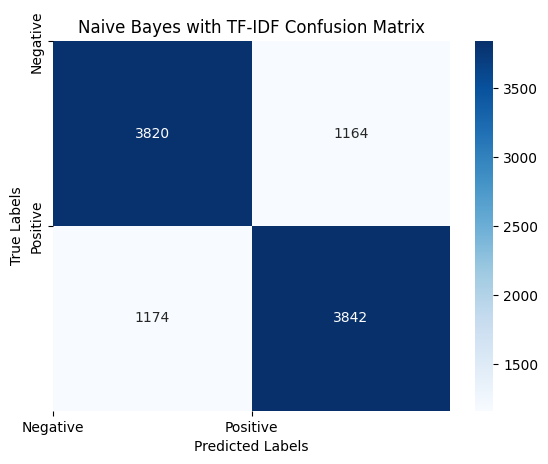

In [ ]:
# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Naive Bayes with TF-IDF Confusion Matrix')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative','Positive'])

# Display the plot
plt.show()

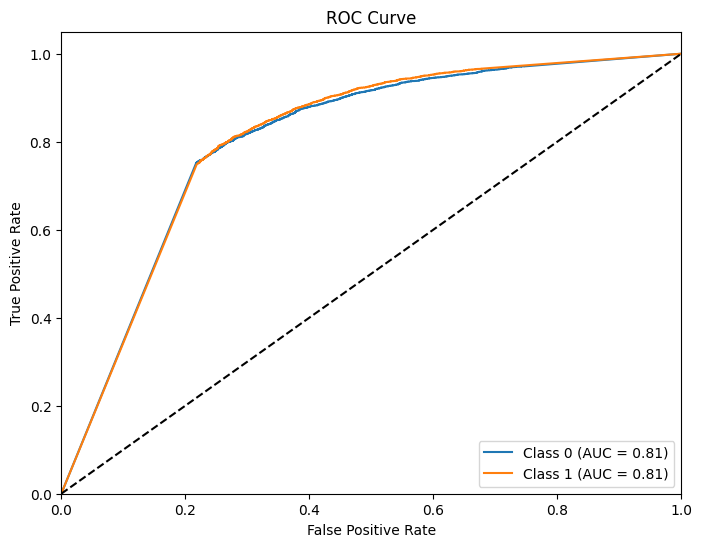

In [ ]:
# ROC curve
num_classes = len(np.unique(y_test))
plot_roc_curve(y_test, y_prob, num_classes)

## NB with Word2Vec

In [ ]:
# Create a Word2Vec model
word2vec_model = Word2Vec(sentences=[tokenize(text) for text in X_train], vector_size=100, window=5, min_count=1, workers=4)

# Create a pipeline for Word2Vec and Gaussian Naive Bayes classifier
pipeline = Pipeline([
    ('word2vec',  Word2VecVectorizer(word2vec_model)),
    ('classifier', GaussianNB())
])

In [ ]:
grid_search = GridSearchCV(pipeline, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)
y_prob = best_pipeline.predict_proba(X_test)

# Evaluate performance metrics
accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)

print("Word2Vec and Gaussian Naive Bayes results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Word2Vec and Gaussian Naive Bayes results:
Accuracy: 0.6932
Precision: 0.7003039386368591
Recall: 0.6932
F1 Score: 0.6906169607481515


In [ ]:
print("Best estimator: ", grid_search.best_estimator_)

Best estimator:  Pipeline(steps=[('word2vec',
                 <__main__.Word2VecVectorizer object at 0x7c43518b7be0>),
                ('classifier', GaussianNB())])


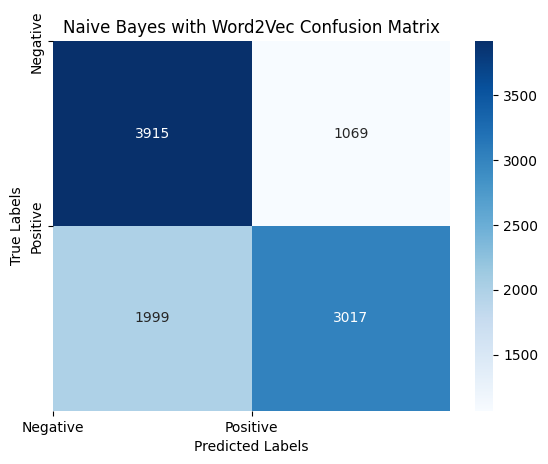

In [ ]:
# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Naive Bayes with Word2Vec Confusion Matrix')
plt.xticks([0, 1],  ['Negative', 'Positive'])
plt.yticks([0, 1],  ['Negative', 'Positive'])

# Display the plot
plt.show()

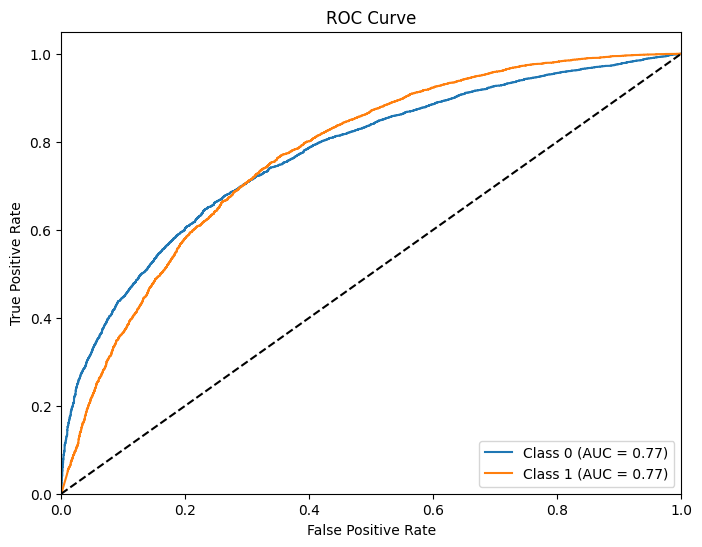

In [ ]:
# ROC curve
num_classes = len(np.unique(y_test))
plot_roc_curve(y_test, y_prob, num_classes)

# XG Boost

In [ ]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier(random_state=1)
XGB_model.fit(X_train1, y_train)

y_pred = XGB_model.predict(X_test1)

print(f"XG Boost train score: {XGB_model.score(X_train1, y_train)}")
print(f"XG Boost test score: {XGB_model.score(X_test1, y_test)}")

Negative review

In [ ]:
input_string = "I won't recommend this place to someone"
print("XGboost model :",XGB_model.predict(vec1.transform([function_clean(input_string)])))

XGboost model : [0]


Positive Review

In [ ]:
input_string = "This is really good place."
print("XGboost model :",XGB_model.predict(vec1.transform([function_clean(input_string)])))

XGboost model : [1]


## XG TFIDF vectoriser

In [ ]:
!pip install xgboost scikit-learn gensim

In [ ]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=100, tokenizer=tokenize, stop_words='english', ngram_range=(1, 3))

# Fit the vectorizer on the training data and transform both training and testing data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = xgb_classifier.predict(X_test_tfidf)
y_prob = xgb_classifier.predict_proba(X_test_tfidf)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


XGBoost with TF-IDF Vectorizer results:
Accuracy: 0.7999
Precision: 0.7999106991346652
Recall: 0.7999
F1 Score: 0.7999003501751715


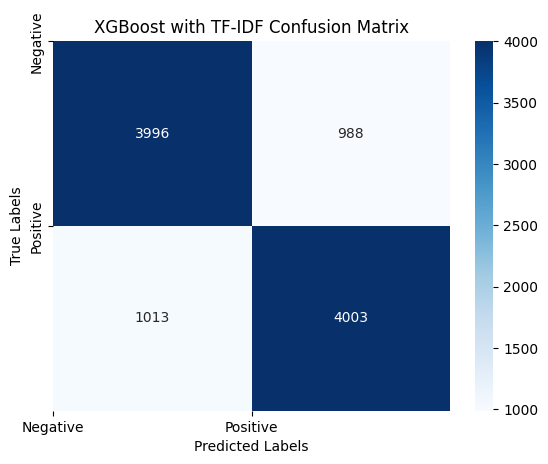

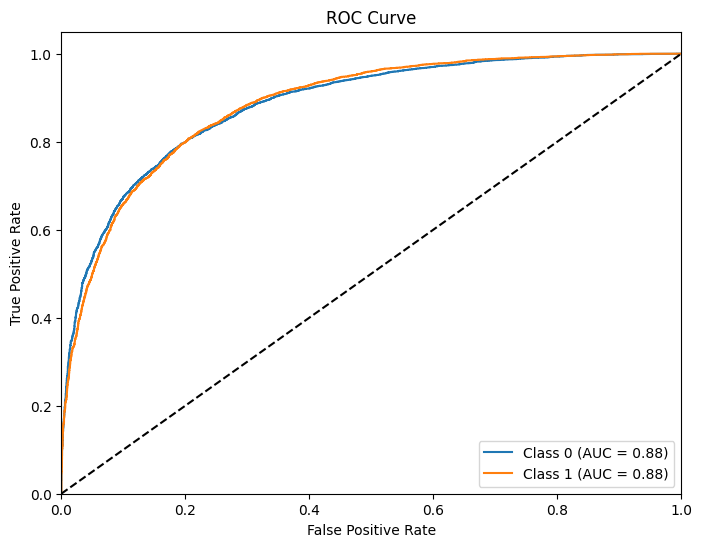

In [ ]:
# Evaluate performance metrics
accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)

print("XGBoost with TF-IDF Vectorizer results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion matrix
# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('XGBoost with TF-IDF Confusion Matrix')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative','Positive'])

# Display the plot
plt.show()

# ROC curve
num_classes = len(np.unique(y_test))
plot_roc_curve(y_test, y_prob, num_classes)

## XG Word2Vec vectoriser

In [ ]:
word2vec_model = Word2Vec(sentences=[tokenize(text) for text in X_train], vector_size=100, window=5, min_count=1, workers=4)

# Create Word2Vec vectorizer
word2vec_vectorizer = Word2VecVectorizer(word2vec_model)

# Vectorize the training and testing data
X_train_word2vec = word2vec_vectorizer.transform(X_train)
X_test_word2vec = word2vec_vectorizer.transform(X_test)

# Train XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train_word2vec, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

XGBoost with Word2Vec Vectorizer results:
Accuracy: 0.7905
Precision: 0.790499931137992
Recall: 0.7905
F1 Score: 0.7904990090466772


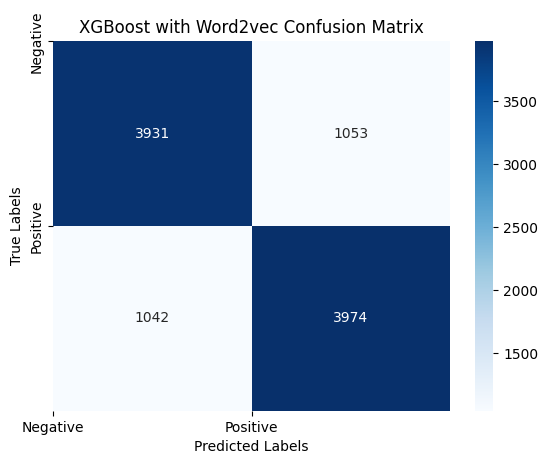

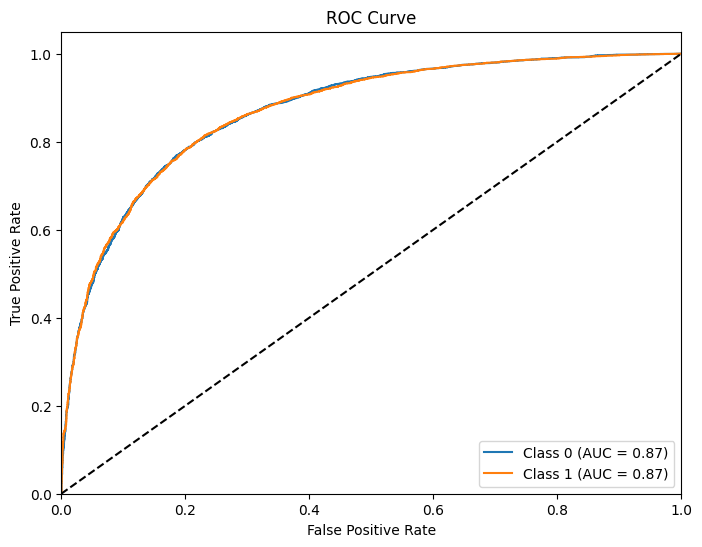

In [ ]:
# Predictions
y_pred = xgb_classifier.predict(X_test_word2vec)
y_prob = xgb_classifier.predict_proba(X_test_word2vec)

# Evaluate performance metrics
accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)

print("XGBoost with Word2Vec Vectorizer results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

all_classes = np.unique(np.concatenate((y_train, y_test)))

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('XGBoost with Word2vec Confusion Matrix')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative','Positive'])

# Display the plot
plt.show()

# ROC curve
num_classes = len(np.unique(y_test))
plot_roc_curve(y_test, y_prob, num_classes)


# LSTM

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Convert any non-string values to strings
df_comp['text'] = df_comp['text'].astype(str)

# Preprocess the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_comp['text'])
sequences = tokenizer.texts_to_sequences(df_comp['text'])
word_index = tokenizer.word_index
max_sequence_length = max([len(seq) for seq in sequences])
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Prepare the target variable
y = df_comp['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(len(word_index) + 1, 100, input_length=max_sequence_length))
model.add(LSTM(128, return_sequences=True))  # Add an additional LSTM layer
model.add(Dropout(0.4))
model.add(LSTM(128))  # Add another LSTM layer
model.add(Dense(64, activation='relu'))  # Add a Dense layer with 64 units and relu activation
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile and train the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 139s 108ms/step - loss: 0.4430 - accuracy: 0.7943 - val_loss: 0.3889 - val_accuracy: 0.8282
Epoch 2/10
1250/1250 [==============================] - 68s 54ms/step - loss: 0.3014 - accuracy: 0.8779 - val_loss: 0.4263 - val_accuracy: 0.8164
Epoch 3/10
1250/1250 [==============================] - 58s 47ms/step - loss: 0.2198 - accuracy: 0.9122 - val_loss: 0.4906 - val_accuracy: 0.8093
Epoch 4/10
1250/1250 [==============================] - 52s 42ms/step - loss: 0.1408 - accuracy: 0.9463 - val_loss: 0.5694 - val_accuracy: 0.8031
Epoch 5/10
1250/1250 [==============================] - 54s 43ms/step - loss: 0.0949 - accuracy: 0.9656 - val_loss: 0.6641 - val_accuracy: 0.7960
Epoch 6/10
1250/1250 [==============================] - 51s 41ms/step - loss: 0.0697 - accuracy: 0.9735 - val_loss: 0.7356 - val_accuracy: 0.7971
Epoch 7/10
1250/1250 [==============================] - 51s 41ms/step - loss: 0.0455 - accuracy: 0.9835 - val_loss: 0.8613

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

313/313 [==============================] - 5s 15ms/step - loss: 1.0895 - accuracy: 0.7888
Loss: 1.0894516706466675
Accuracy: 0.7888000011444092


In [ ]:
# Generate predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

313/313 [==============================] - 5s 15ms/step


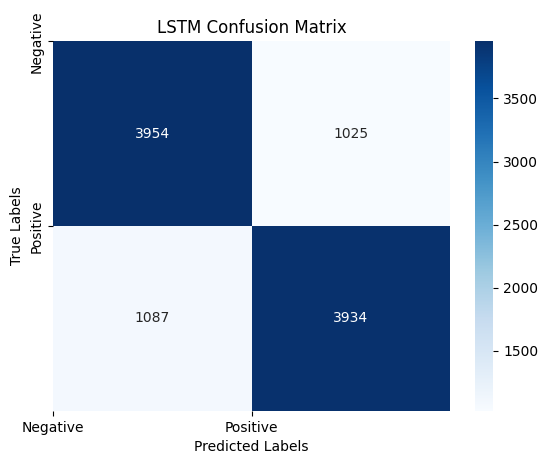

In [ ]:
# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('LSTM Confusion Matrix')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative','Positive'])

# Display the plot
plt.show()

In [ ]:
# Classification Report
target_names = ['Class 0', 'Class 1']
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.78      0.79      0.79      4979
     Class 1       0.79      0.78      0.79      5021

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



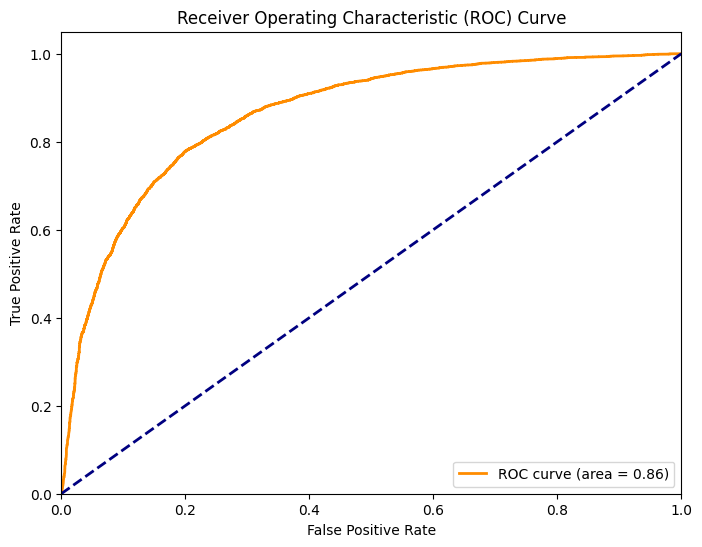

In [ ]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

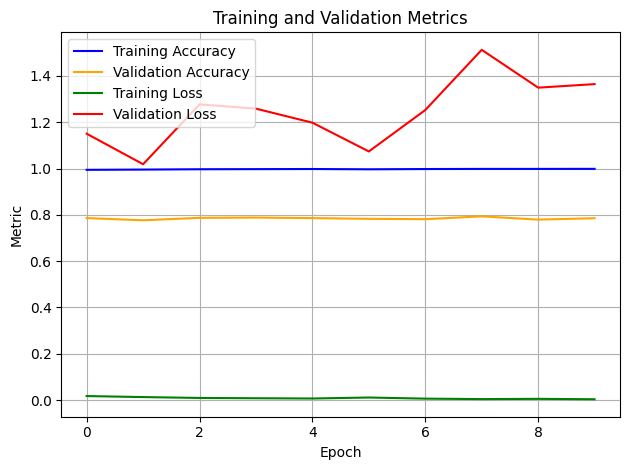

In [ ]:
# Accuracy and Loss Graphs
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.plot(history.history['loss'], label='Training Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')

plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Training and Validation Metrics')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Print the model architecture
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 501, 100)          8546400   
                                                                 
 lstm_9 (LSTM)               (None, 501, 128)          117248    
                                                                 
 dropout_3 (Dropout)         (None, 501, 128)          0         
                                                                 
 lstm_10 (LSTM)              (None, 128)               131584    
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,803,553
Trainable params: 8,803,553
No

To Save and reuse the model

In [ ]:
# Save the model
model.save("LSTM_sentiment_analysis_model.h5")

In [ ]:
# TO import and reuse the model
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("LSTM_sentiment_analysis_model.h5")

# Use the loaded model for predictions or further training

# BERT

In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118!

Looking in indexes: https://download.pytorch.org/whl/cu118!


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 113.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

# Split the dataset into train and test sets
train_df = df_comp.sample(frac=0.8, random_state=42)
test_df = df_comp.drop(train_df.index)

# Define a custom dataset class for BERT input
class ReviewDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = str(self.texts[index])
        label = self.labels[index]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

def tokenize(texts, tokenizer):
    # Tokenize a list of texts using the given tokenizer
    return tokenizer.batch_encode_plus(
        texts,
        add_special_tokens=True,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )


# Set the device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2).to(device)

# Define the optimizer and learning rate
optimizer = AdamW(model.parameters(), lr=2e-5)

# Set the batch size and maximum sequence length
batch_size = 16
max_length = 150


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Create the train and test datasets and dataloaders
train_dataset = ReviewDataset(train_df['text'].tolist(), train_df['target'].tolist(), tokenizer, max_length)
test_dataset = ReviewDataset(test_df['text'].tolist(), test_df['target'].tolist(), tokenizer, max_length)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Training loop
model.train()
# List to store training summary
training_summary = []

for epoch in range(5):  # Number of training epochs
    total_loss = 0
    total_correct = 0
    total_samples = 0

    for batch in train_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.logits, dim=1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    average_loss = total_loss / len(train_dataloader)
    accuracy = total_correct / total_samples
    print(f'Epoch {epoch + 1}/{10}, Loss: {average_loss}')

    # Save training summary for this epoch
    training_summary.append({'epoch': epoch + 1, 'loss': average_loss, 'accuracy': accuracy})

Epoch 1/10, Loss: 0.3989620852231979
Epoch 2/10, Loss: 0.28517674350067973
Epoch 3/10, Loss: 0.17972622685022652
Epoch 4/10, Loss: 0.1000513408455532
Epoch 5/10, Loss: 0.06441178585104644


In [ ]:
for epoch_summary in training_summary:
    print(f"Epoch {epoch_summary['epoch']}, Loss: {epoch_summary['loss']}, Accuracy: {epoch_summary['accuracy']}")

Epoch 1, Loss: 0.3989620852231979, Accuracy: 0.8186204655116378
Epoch 2, Loss: 0.28517674350067973, Accuracy: 0.8805470136753419
Epoch 3, Loss: 0.17972622685022652, Accuracy: 0.9309732743318583
Epoch 4, Loss: 0.1000513408455532, Accuracy: 0.9643991099777495
Epoch 5, Loss: 0.06441178585104644, Accuracy: 0.9774494362359059


In [ ]:
# Evaluation loop
predictions = []
targets = []
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for batch in test_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predicted = torch.max(outputs.logits, dim=1)

        predictions.extend(predicted.cpu().numpy())
        targets.extend(labels.cpu().numpy())

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.8427


In [ ]:
# Create the confusion matrix
conf_matrix = confusion_matrix(targets, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
target_names = ['Negative', 'Positive']
print("Classification Report:")
print(classification_report(targets, predictions, target_names=target_names))

Confusion Matrix:
[[4006  919]
 [ 654 4421]]
Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.81      0.84      4925
    Positive       0.83      0.87      0.85      5075

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



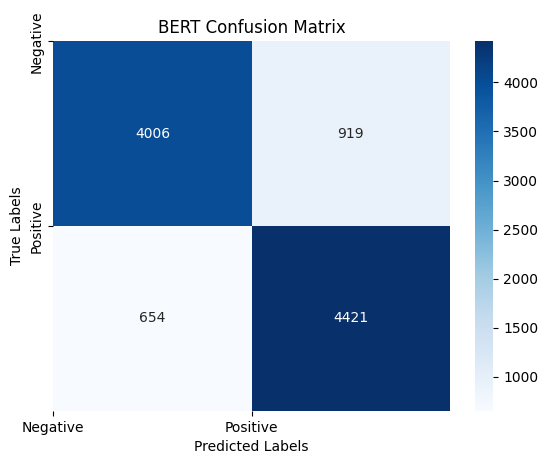

In [ ]:
# Calculate confusion matrix
confusion_mat = confusion_matrix(targets, predictions)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('BERT Confusion Matrix')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative','Positive'])

# Display the plot
plt.show()

F1 Score: 0.8489678348535765


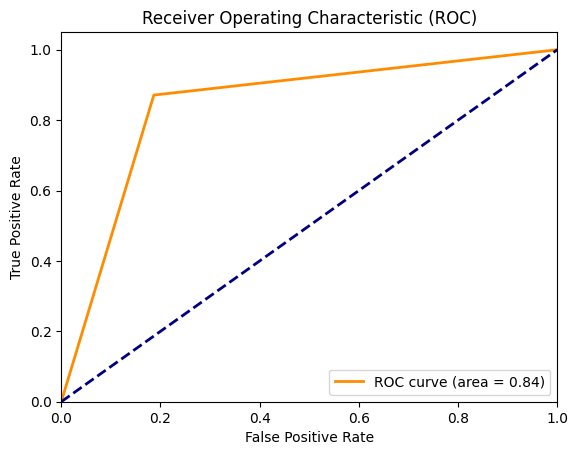

In [ ]:
# Calculate F1 score
f1 = f1_score(targets, predictions)
print("F1 Score:", f1)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(targets, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

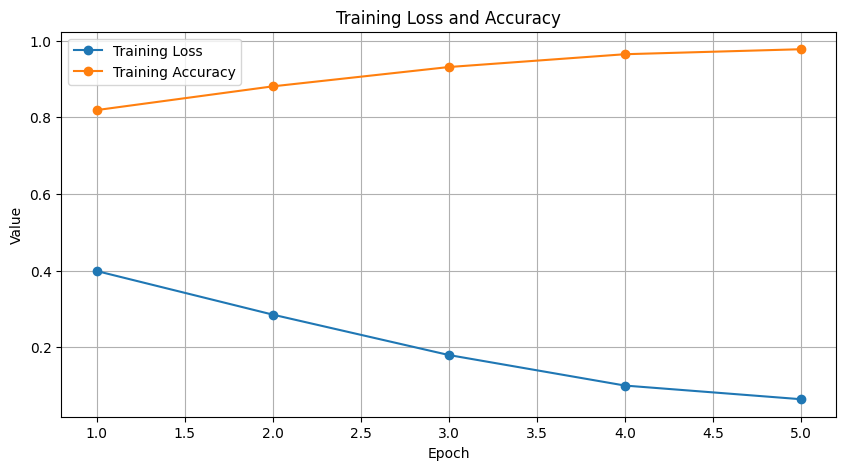

In [ ]:
# Plot accuracy and loss
epochs = [epoch_summary['epoch'] for epoch_summary in training_summary]
losses = [epoch_summary['loss'] for epoch_summary in training_summary]
accuracies = [epoch_summary['accuracy'] for epoch_summary in training_summary]

plt.figure(figsize=(10, 5))
plt.plot(epochs, losses, label='Training Loss', marker='o')
plt.plot(epochs, accuracies, label='Training Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss and Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Save the BERT model
model.save_pretrained("bert_model_saved_prasad")

Example of BERT Sentiment prediction

In [ ]:
# Example prediction
input_text = "This restaurant is great!"

encoding = tokenizer(
    input_text,
    add_special_tokens=True,
    max_length=max_length,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)
input_ids = encoding['input_ids'].to(device)
attention_mask = encoding['attention_mask'].to(device)

model.eval()
with torch.no_grad():
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1).item()

print("Example Prediction:")
print("Input Text:", input_text)
print("Predicted Class:", predicted_class)
print("Probabilities:", probabilities.tolist())

Example Prediction:
Input Text: This restaurant is great!
Predicted Class: 1
Probabilities: [[0.0006875505787320435, 0.9993124008178711]]


# Comparison of all Models

In [ ]:
naive_bayes_tfidf_accuracy_per = 76.62
naive_bayes_tfidf_accuracy = 0.7662
naive_bayes_tfidf_precision = 0.7672
naive_bayes_tfidf_recall = 0.7656
naive_bayes_tfidf_f1 = 0.7664

naive_bayes_word2vec_accuracy_per = 69.32
naive_bayes_word2vec_accuracy = 0.6932
naive_bayes_word2vec_precision = 0.7388
naive_bayes_word2vec_recall = 0.6014
naive_bayes_word2vec_f1 = 0.6625

xgboost_tfidf_accuracy_per = 79.99
xgboost_tfidf_accuracy = 0.7999
xgboost_tfidf_precision = 0.7999
xgboost_tfidf_recall = 0.7991
xgboost_tfidf_f1 = 0.7990

xgboost_word2vec_accuracy_per = 79.05
xgboost_word2vec_accuracy = 0.7905
xgboost_word2vec_precision = 0.7905
xgboost_word2vec_recall = 0.7904
xgboost_word2vec_f1 = 0.7904

lstm_accuracy_per = 79.00
lstm_accuracy = 00.79
lstm_precision = 0.7939
lstm_recall = 0.7838
lstm_f1 = 0.7888

bert_accuracy_per = 85.00
bert_accuracy = 0.85
bert_precision = 0.8273
bert_recall = 0.8719
bert_f1 = 0.8490


In [ ]:
# Performance metrics for each algorithm
algorithms = ['Naive Bayes (TF-IDF)', 'Naive Bayes (Word2Vec)', 'XGBoost (TF-IDF)', 'XGBoost (Word2Vec)', 'LSTM', 'BERT']
accuracy = [naive_bayes_tfidf_accuracy, naive_bayes_word2vec_accuracy, xgboost_tfidf_accuracy, xgboost_word2vec_accuracy, lstm_accuracy, bert_accuracy]
precision = [naive_bayes_tfidf_precision, naive_bayes_word2vec_precision, xgboost_tfidf_precision, xgboost_word2vec_precision, lstm_precision, bert_precision]
recall = [naive_bayes_tfidf_recall, naive_bayes_word2vec_recall, xgboost_tfidf_recall, xgboost_word2vec_recall, lstm_recall, bert_recall]
f1 = [naive_bayes_tfidf_f1, naive_bayes_word2vec_f1, xgboost_tfidf_f1, xgboost_word2vec_f1, lstm_f1, bert_f1]

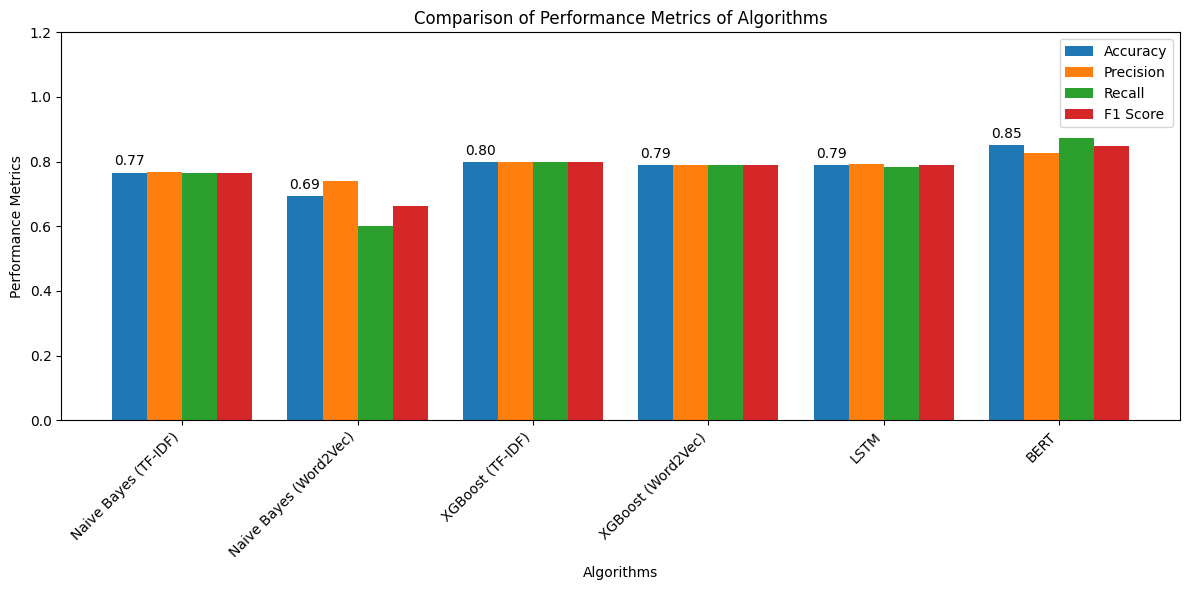

In [ ]:
# Plot the bar graph
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2
x = np.arange(len(algorithms))

bars1 = ax.bar(x - 1.5 * width, accuracy, width, label='Accuracy')
bars2 = ax.bar(x - 0.5 * width, precision, width, label='Precision')
bars3 = ax.bar(x + 0.5 * width, recall, width, label='Recall')
bars4 = ax.bar(x + 1.5 * width, f1, width, label='F1 Score')

# Set y-axis limit
ax.set_ylim(0, 1.2)  # Adjust the limits as needed

ax.set_xticks(x)
ax.set_xticklabels(algorithms, rotation=45, ha='right')
ax.set_xlabel('Algorithms')
ax.set_ylabel('Performance Metrics')
ax.set_title('Comparison of Performance Metrics of Algorithms')
ax.legend()

# Display accuracy on top of bars
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

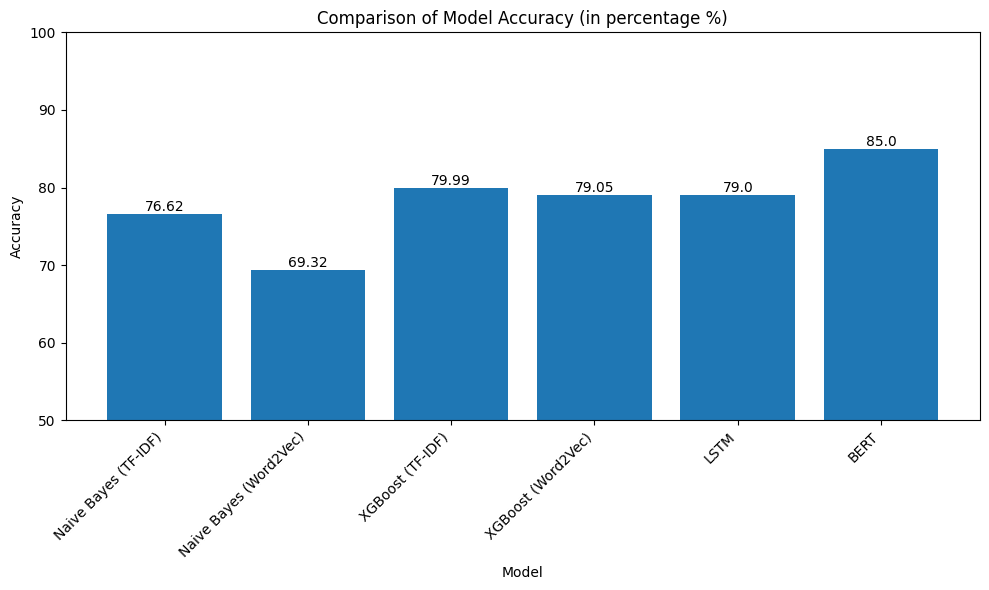

In [ ]:

# Create a DataFrame to store the accuracy values of each model
accuracy_data = {
    'Model': ['Naive Bayes (TF-IDF)', 'Naive Bayes (Word2Vec)', 'XGBoost (TF-IDF)', 'XGBoost (Word2Vec)', 'LSTM', 'BERT'],
    'Accuracy': [naive_bayes_tfidf_accuracy_per, naive_bayes_word2vec_accuracy_per, xgboost_tfidf_accuracy_per, xgboost_word2vec_accuracy_per, lstm_accuracy_per, bert_accuracy_per]
}

accuracy_df = pd.DataFrame(accuracy_data)

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color="green")
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy (in percentage %)')
plt.xticks(rotation=45, ha='right')
plt.ylim(50, 100)  # Set the y-axis limits to better display the differences
# Display accuracy values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.tight_layout()
plt.show()